In [2]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import recall_score
from sklearn.metrics import confusion_matrix

from sklearn.feature_extraction import FeatureHasher

dataset = pd.read_csv('CLEF.csv', delimiter = '\t')

for col in ['public_id','title','text', 'our rating']:
    dataset[col] = dataset[col].astype('category')


dataset = pd.get_dummies(data=dataset,columns=['public_id','title','text'])


from sklearn.preprocessing import LabelEncoder

labelencoder = LabelEncoder() 
dataset['our rating'] = labelencoder.fit_transform(dataset['our rating'])

X=dataset.drop(columns=['our rating'])
y=dataset['our rating']

X_train, X_test, y_train, y_test= train_test_split(X,y,test_size=0.2)


model=DecisionTreeClassifier()

model.fit(X_train,y_train)

predictions=model.predict(X_test)

score=accuracy_score(y_test, predictions)
score

0.4

In [3]:
score1=f1_score(y_test,predictions, average=None)
score1

array([0.57142857, 0.        , 0.        ])

In [4]:
score2=recall_score(y_test, predictions, average=None)
score2

array([1., 0., 0.])

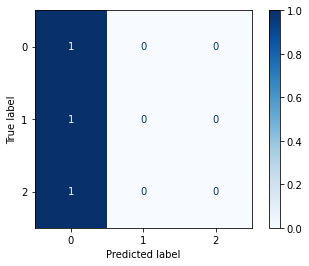

In [5]:
from sklearn.metrics import plot_confusion_matrix
plot_confusion_matrix(model, X_test, y_test, cmap=plt.cm.Blues, normalize='true')